In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_df = pd.read_csv('combined_hh_dataset.csv')

#Combinining Differently Named Columns
groups = {
    'child_has_to_work': [
        'school3', 'school15', 'outschool1', 'school_out1'
    ],
    'school_too_far': [
        'school4', 'school16', 'outschool2', 'school_out2'
    ],
    'school_fees_high': [
        'school5', 'school17', 'outschool3', 'school_out3'
    ],
    'school_strike': [
        'school6', 'school18', 'outschool4', 'school_out4'
    ],
    'child_married': [
        'school7', 'school19', 'outschool5', 'school_out5', 'school_out5'
    ],
    'fear_violence': [
        'school8', 'school20', 'outschool6', 'school_out6'
    ],
    'education_not_important': [
        'school9', 'school21', 'outschool7', 'school_out7'
    ],
    'rejected_due_to_nationality': [
        'school10', 'school22', 'outschool8', 'school_out8'
    ],
    'overcrowded_classes': [
        'school11', 'school23', 'outschool9', 'school_out9'
    ],
    'no_birth_certificate': [
        'school12', 'school24', 'outschool10', 'school_out10'
    ],
    'other_reason': [
        'school13', 'school25', 'outschool11'
    ]
}

def combine_school_reasons(df, groups):
    for new_col, old_cols in groups.items():
        available_cols = [col for col in old_cols if col in df.columns]
        if available_cols:
            df[new_col] = df[available_cols].max(axis=1)
    return df


df = combine_school_reasons(combined_df, groups)
df["school_combined"] = df["school1"].combine_first(df["school_attend"])

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_8153/3993861754.py:1: DtypeWarning: Columns (4,5,8,10,14,18,20,99,100,105,113,114,125,126,127,160,161,162,170,171,224,261,263,264,382,383,407,408,412,414,417,418,431,463,464,480,487,488,505,506,518,530,531,545,554,561,563,571,572,576,578,581,582,592,608,610,611,612,623,632,633,634,635,639,642,646,651,653,655,657,663,670,671,685,688,703,722,738,739,740,748) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_hh_dataset.csv')


In [3]:
###Labour Indicators###
yes_no_map = {'Yes': 1.0, 'No': 0.0}

# Apply this mapping to all relevant columns
columns_to_check = [
    'child_work0', 'child_work1', 'child_work2', 'child_work3',
    'child_work4', 'child_work5'
]

df[columns_to_check] = df[columns_to_check].apply(lambda col: col.map(yes_no_map).fillna(col))
# Make sure all relevant columns exist
columns_to_check = [
    'child_work0', 'child_work1', 'child_work2', 'child_work3',
    'child_work4', 'child_work5'
]

# Create new combined column: flag if any of the conditions are met
df['child_labor_flag'] = df[columns_to_check].apply(
    lambda row: any(pd.to_numeric(row, errors='coerce').fillna(0) > 0), axis=1
)

df['child_labor_count'] = df[columns_to_check].apply(
    lambda row: pd.to_numeric(row, errors='coerce').fillna(0).gt(0).sum(), axis=1
)

df['child_labor_total_children'] = df[columns_to_check].apply(
    lambda row: pd.to_numeric(row, errors='coerce').fillna(0).sum(), axis=1
)

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_8153/3434046711.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_check] = df[columns_to_check].apply(lambda col: col.map(yes_no_map).fillna(col))
/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_8153/3434046711.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_check] = df[columns_to_check].apply(lambda col: col.map(yes_no_map).fillna(col))
/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_8153/3434046711.py:10: FutureWarning: Downcasting objec

In [4]:
df['current_debt'] = df['borr2'].combine_first(df['debt_current'])
df['work_income'] = df['inc2'].combine_first(df['money1'])
df['humanitarian_assistance_income'] = df['inc5'].combine_first(df['money1'])

In [15]:
#RegionalDF
columns_required = ['hh_size', 'no_children','no_over_fifteen',
                    'work_income', 'humanitarian_assistance_income',
                    'eviction_notice', 'actual_eviction', 
                    'socio_econ_rent', 'socio_econ_food_money', 'socio_econ_healthcare', 'socio_econ_medicine', 'socio_econ_med_availability',
                    'socio_econ_loss_job', 'socio_econ_famsupport', 'socio_econ_mentalhealth', 'socio_econ_education', 'socio_econ_shelter', 'socio_econ_threat_evict',
                    'socio_econ_lowerqual_shelter', 'socio_econ_abandoned', 'socio_econ_return', 'socio_econ_moved_leb', 'socio_econ_travel_third', 'socio_econ_baby',
                    'socio_econ_travel_homeclimate', 'socio_econ_none', 'socio_econ_dk01', 'socio_econ_noreply', 'current_debt' , 'unabletravel',
                    'children_symptoms_sadness', 'children_symptoms_withdrawal', 'children_symptoms_selfharm', 'children_symptoms_suicidal', 'children_symptoms_low_interest',
                    'children_symptoms_no_symptoms', 'children_symptoms_dk', 'children_symptoms_noreply', 'child_has_to_work', 'school_too_far', 'school_fees_high',
                    'school_strike', 'child_married', 'fear_violence', 'education_not_important', 'rejected_due_to_nationality',
                    'overcrowded_classes', 'no_birth_certificate', 'other_reason', 'id', 'year', 'quarter',
                    'specific_needs_hh_womanrisk', 'specific_needs_hh_childrisk', 'specific_needs_hh_singlepar',
                    'child_labor_flag', 'child_labor_count', 'child_labor_total_children',
                        "tensions_incidents_verbal_harass", "tensions_incidents_phys_harass", "tensions_incidents_robbery", "tensions_incidents_women_harass", "tensions_incidents_subsidized",
                        "tensions_incidents_shop_atm", "tensions_incidents_socmedia", "tensions_incidents_medarticle", "tensions_incidents_armedviol", "tensions_incidents_physviolence", "tensions_incidents_politstatem",
                        "tensions_incidents_protest", "tensions_incidents_disputes", "tensions_incidents_eviction", "tensions_incidents_movement", "tensions_incidents_threat", "tensions_incidents_discrim",
                        'dist_leb', "school_combined"
                    ]

final_df = df[columns_required]
final_df = final_df[(final_df['no_children'] != 0) & final_df['no_children'].notna()]
final_df = final_df[final_df['year'] >= 2022]

In [9]:
nan_count = final_df.isna().sum() / len(final_df) * 100
nan_count_sorted = nan_count.sort_values(ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan_count_sorted)

other_reason                        84.928541
child_has_to_work                   77.137245
rejected_due_to_nationality         77.137245
school_too_far                      77.137245
school_fees_high                    77.137245
school_strike                       77.137245
child_married                       77.137245
fear_violence                       77.137245
education_not_important             77.137245
overcrowded_classes                 77.137245
no_birth_certificate                77.137245
humanitarian_assistance_income      69.857083
work_income                         68.993165
socio_econ_baby                     54.276494
unabletravel                        54.276494
socio_econ_travel_homeclimate       54.276494
current_debt                        15.073463
tensions_incidents_discrim          12.928702
school_combined                     10.948305
dist_leb                             2.483513
socio_econ_abandoned                 0.000000
tensions_incidents_subsidized     

In [92]:
final_df.to_csv('cleaned_Lebanon_df_HH.csv', index = False)

In [12]:
non_numeric_cols = final_df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['eviction_notice', 'actual_eviction', 'unabletravel', 'quarter',
       'child_labor_flag', 'dist_leb', 'school_combined'],
      dtype='object')


In [13]:
final_df['school_No – My child/children are still attending school'].value_counts()

KeyError: 'school_No – My child/children are still attending school'

In [14]:
yes_no_map = {'Yes': 1.0, 'No': 0.0, 'Do not know': np.nan, 'No reply': np.nan}
true_false_map = {True: 1.0, False: 0.0}
final_df['eviction_notice'] = final_df['eviction_notice'].map(yes_no_map).fillna(np.nan)
final_df['actual_eviction'] = final_df['actual_eviction'].map(yes_no_map).fillna(np.nan)
final_df['unabletravel'] = final_df['unabletravel'].map(yes_no_map).fillna(np.nan)
final_df['child_labor_flag'] = final_df['child_labor_flag'].map(true_false_map).fillna(np.nan)
final_df['school_No – My child/children are still attending school'] = final_df['school_No – My child/children are still attending school'].map(true_false_map).fillna(np.nan)
final_df['school_No – My child/children were already out of school'] = final_df['school_No – My child/children were already out of school'].map(true_false_map).fillna(np.nan)
final_df['school_Yes – I have a child who was attending school but who stopped in the last 30 days'] = final_df['school_Yes – I have a child who was attending school but who stopped in the last 30 days'].map(true_false_map).fillna(np.nan)
final_df['school_child/children are too young for school'] = final_df['school_child/children are too young for school'].map(true_false_map).fillna(np.nan)

KeyError: 'school_No – My child/children are still attending school'

In [16]:
# One-hot encode the 'school_combined' column
school_dummies = pd.get_dummies(final_df['school_combined'], prefix='school')

# Concatenate back to the original DataFrame
final_df = pd.concat([final_df, school_dummies], axis=1)

In [17]:
final_df.columns

Index(['hh_size', 'no_children', 'no_over_fifteen', 'work_income',
       'humanitarian_assistance_income', 'eviction_notice', 'actual_eviction',
       'socio_econ_rent', 'socio_econ_food_money', 'socio_econ_healthcare',
       'socio_econ_medicine', 'socio_econ_med_availability',
       'socio_econ_loss_job', 'socio_econ_famsupport',
       'socio_econ_mentalhealth', 'socio_econ_education', 'socio_econ_shelter',
       'socio_econ_threat_evict', 'socio_econ_lowerqual_shelter',
       'socio_econ_abandoned', 'socio_econ_return', 'socio_econ_moved_leb',
       'socio_econ_travel_third', 'socio_econ_baby',
       'socio_econ_travel_homeclimate', 'socio_econ_none', 'socio_econ_dk01',
       'socio_econ_noreply', 'current_debt', 'unabletravel',
       'children_symptoms_sadness', 'children_symptoms_withdrawal',
       'children_symptoms_selfharm', 'children_symptoms_suicidal',
       'children_symptoms_low_interest', 'children_symptoms_no_symptoms',
       'children_symptoms_dk', 'childre

In [18]:
final_df[(final_df['year'] == 2024) & (final_df['dist_leb'] == 'Jbeil')].groupby(['year', 'quarter', 'dist_leb'])['school_fees_high'].sum()

year  quarter  dist_leb
2024  Q1       Jbeil       5.0
      Q2       Jbeil       7.0
Name: school_fees_high, dtype: float64

In [19]:
from pandas import DataFrame

# 1. Define columns for mean aggregation
mean_columns = [
    'hh_size', 'no_children', 'no_over_fifteen', 'current_debt',
    'child_labor_count', 'child_labor_total_children', 'work_income',
    'humanitarian_assistance_income', 'school_No – My child/children are still attending school',
    '', '', '' 
]

# 2. Define binary columns to calculate % of responses == 1
binary_percent_cols = [
    'child_has_to_work', 'school_too_far', 'school_fees_high', 'school_strike',
    'child_married', 'fear_violence', 'education_not_important',
    'rejected_due_to_nationality', 'overcrowded_classes',
    'no_birth_certificate', 'other_reason'
]

# 3. Groupby columns
groupby_cols = ['year', 'quarter', 'dist_leb']

# 4. Get numeric columns and remove groupby columns
numeric_cols = final_df.select_dtypes(include='number').columns.tolist()
agg_targets = [col for col in numeric_cols if col not in groupby_cols]

# 5. Build aggregation dictionary
agg_dict = {
    col: ('mean' if col in mean_columns else 'sum')
    for col in agg_targets
}

# 6. Perform aggregation
geo_df = final_df.groupby(groupby_cols).agg(agg_dict).reset_index()

# 7. Rename mean columns to include "_avg"
geo_df = geo_df.rename(columns={
    col: f"{col}_avg" for col in geo_df.columns if col in mean_columns
})

# 8. Add binary % columns (responses == 1 / non-NA total per group)
# First: group the original data to count non-NA responses and sum of "== 1"
for col in binary_percent_cols:
    total_non_na = final_df.groupby(groupby_cols)[col].count()
    num_ones = final_df.groupby(groupby_cols)[col].apply(lambda x: (x == 1).sum())
    percent_col = f"{col}_pct"
    geo_df[percent_col] = (num_ones / total_non_na * 100).reset_index(drop=True)


# At the end, round only the _pct columns
geo_df.loc[:, geo_df.columns.str.endswith('_pct')] = geo_df.filter(like="_pct").round(2)

# Rename mean columns if they exist
geo_df = geo_df.rename(columns={
    col: f"{col}_avg" for col in mean_columns if col in geo_df.columns
})

In [20]:
# Aggregation logic
labour_agg = final_df.groupby(groupby_cols).agg(
    total_flagged_hhs=('child_labor_flag', lambda x: (x == 1).sum()),
    total_responses=('child_labor_flag', lambda x: x.notna().sum()),
    child_labor_incidents=('child_labor_count', 'sum'),
    total_children_working=('child_labor_total_children', 'sum'),
).reset_index()

# Add percentage of flagged HHs (of all valid responses)
labour_agg['pct_flagged_hhs'] = (labour_agg['total_flagged_hhs'] / labour_agg['total_responses']) * 100
labour_agg['pct_flagged_hhs'] = labour_agg['pct_flagged_hhs'].round(2)

In [21]:


# List of the school-related columns to aggregate
school_cols = [
    'school_No – My child/children are still attending school',
    'school_No – My child/children were already out of school',
    'school_Yes – I have a child who was attending school but who stopped in the last 30 days',
    'school_child/children are too young for school'
]

# Group by year, quarter, and district
aggregated = (
    final_df
    .groupby(['year', 'quarter', 'dist_leb'])[school_cols]
    .agg(['mean', 'count'])  # mean = percentage of 1s; count = total responses
    .reset_index()
)

# Flatten MultiIndex columns
aggregated.columns = ['_'.join(col).strip('_') for col in aggregated.columns]

# ✅ FIXED: Include colon in the dictionary comprehension
renamed_cols = {
    f'{col}_mean': f'{col}_pct'
    for col in school_cols
}
renamed_cols.update({
    f'{col}_count': f'{col}_total'
    for col in school_cols
})

# Apply renaming
aggregated.rename(columns=renamed_cols, inplace=True)

# Preview result
aggregated.head()


,year,quarter,dist_leb,school_No – My child/children are still attending school_pct,school_No – My child/children are still attending school_total,school_No – My child/children were already out of school_pct,school_No – My child/children were already out of school_total,school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct,school_Yes – I have a child who was attending school but who stopped in the last 30 days_total,school_child/children are too young for school_pct,school_child/children are too young for school_total
0,2022,Q1,Akkar,0.0,361,0.0,361,0.0,361,0.0,361
1,2022,Q1,Aley,0.0,231,0.0,231,0.0,231,0.0,231
2,2022,Q1,Baabda,0.0,319,0.0,319,0.0,319,0.0,319
3,2022,Q1,Baalbek,0.0,445,0.0,445,0.0,445,0.0,445
4,2022,Q1,Bcharre,0.0,1,0.0,1,0.0,1,0.0,1


In [22]:
aggregated.columns

Index(['year', 'quarter', 'dist_leb',
       'school_No – My child/children are still attending school_pct',
       'school_No – My child/children are still attending school_total',
       'school_No – My child/children were already out of school_pct',
       'school_No – My child/children were already out of school_total',
       'school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct',
       'school_Yes – I have a child who was attending school but who stopped in the last 30 days_total',
       'school_child/children are too young for school_pct',
       'school_child/children are too young for school_total'],
      dtype='object')

In [23]:
geo_df = geo_df.merge(labour_agg)
geo_df = geo_df.merge(aggregated)


In [24]:
geo_df.head()

,year,quarter,dist_leb,hh_size_avg,no_children_avg,no_over_fifteen_avg,work_income_avg,humanitarian_assistance_income_avg,socio_econ_rent,socio_econ_food_money,...,total_children_working,pct_flagged_hhs,school_No – My child/children are still attending school_pct,school_No – My child/children are still attending school_total,school_No – My child/children were already out of school_pct,school_No – My child/children were already out of school_total,school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct,school_Yes – I have a child who was attending school but who stopped in the last 30 days_total,school_child/children are too young for school_pct,school_child/children are too young for school_total
0,2022,Q1,Akkar,5.529086,3.091413,2.504155,NaN,NaN,302.0,351.0,...,0.0,0.0,0.0,361,0.0,361,0.0,361,0.0,361
1,2022,Q1,Aley,5.675325,2.904762,2.891775,NaN,NaN,180.0,228.0,...,0.0,0.0,0.0,231,0.0,231,0.0,231,0.0,231
2,2022,Q1,Baabda,5.934169,3.181818,2.915361,NaN,NaN,253.0,314.0,...,0.0,0.0,0.0,319,0.0,319,0.0,319,0.0,319
3,2022,Q1,Baalbek,5.842697,3.294382,2.739326,NaN,NaN,297.0,432.0,...,0.0,0.0,0.0,445,0.0,445,0.0,445,0.0,445
4,2022,Q1,Bcharre,7.000000,5.000000,3.000000,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,1,0.0,1,0.0,1,0.0,1


In [25]:
geo_df.to_csv('Regional_Quarter_YearDataset_Lebanon.csv', index = False)

In [26]:
geo_df_2024 = geo_df[geo_df['year'] == 2024]

In [31]:
non_school_attendance = ['child_has_to_work_pct', 'school_too_far_pct', 'school_fees_high_pct', 'school_strike_pct',
    'child_married_pct', 'fear_violence_pct', 'education_not_important_pct',
    'rejected_due_to_nationality_pct', 'overcrowded_classes_pct',
    'no_birth_certificate_pct', 'other_reason_pct']

no_school_2024 = geo_df_2024.groupby(['year', 'dist_leb'])[non_school_attendance].mean().reset_index()

In [32]:
school_cols = ['child_has_to_work', 'school_too_far', 'school_fees_high', 'school_strike',
    'child_married', 'fear_violence', 'education_not_important',
    'rejected_due_to_nationality', 'overcrowded_classes',
    'no_birth_certificate', 'other_reason', 'child_labor_flag']

no_school_sum_2024 = geo_df_2024.groupby(['year', 'dist_leb'])[school_cols].sum().reset_index()

KeyError: "Columns not found: 'child_labor_flag'"

In [76]:
no_school_2024 = no_school_2024.merge(no_school_sum_2024)

In [77]:
no_school_2024.columns

Index(['year', 'dist_leb', 'child_has_to_work_pct', 'school_too_far_pct',
       'school_fees_high_pct', 'school_strike_pct', 'child_married_pct',
       'fear_violence_pct', 'education_not_important_pct',
       'rejected_due_to_nationality_pct', 'overcrowded_classes_pct',
       'no_birth_certificate_pct', 'other_reason_pct', 'child_has_to_work',
       'school_too_far', 'school_fees_high', 'school_strike', 'child_married',
       'fear_violence', 'education_not_important',
       'rejected_due_to_nationality', 'overcrowded_classes',
       'no_birth_certificate', 'other_reason', 'child_labor_flag'],
      dtype='object')

In [35]:
### Grouping Overall
non_school_attendance = ['child_has_to_work_pct', 'school_too_far_pct', 'school_fees_high_pct', 'school_strike_pct',
    'child_married_pct', 'fear_violence_pct', 'education_not_important_pct',
    'rejected_due_to_nationality_pct', 'overcrowded_classes_pct',
    'no_birth_certificate_pct', 'other_reason_pct']

schooling_df = geo_df.groupby(['dist_leb'])[non_school_attendance].mean().reset_index()

school_cols = ['child_has_to_work', 'school_too_far', 'school_fees_high', 'school_strike',
    'child_married', 'fear_violence', 'education_not_important',
    'rejected_due_to_nationality', 'overcrowded_classes',
    'no_birth_certificate', 'other_reason']

schooling_df_sum = geo_df.groupby(['dist_leb'])[school_cols].sum().reset_index()

schooling_df = schooling_df.merge(schooling_df_sum)


In [37]:
# Make sure you're only using one row per district (if multiple years/quarters exist, you may need to aggregate first)
# For now, we'll assume there's one row per district in geo_df

# Sort by total count of responses where 'school_fees_high' == 1
sorted_df = no_school_2024.sort_values(by='school_fees_high', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='school_fees_high', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['school_fees_high'] + 0.06,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                 # Y position (based on sorted index)
             f"{row['school_fees_high_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'School Fees High'")
plt.ylabel("District")
plt.title("2024 Responses - School Fees High: Total Count and % of Respondents by District")
plt.tight_layout()
plt.savefig('highschoolfees_2024.png')
plt.show()

KeyError: 'school_fees_high'

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_53620/1796535352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education_not_important', y='dist_leb', data=sorted_df, palette='Blues_d')


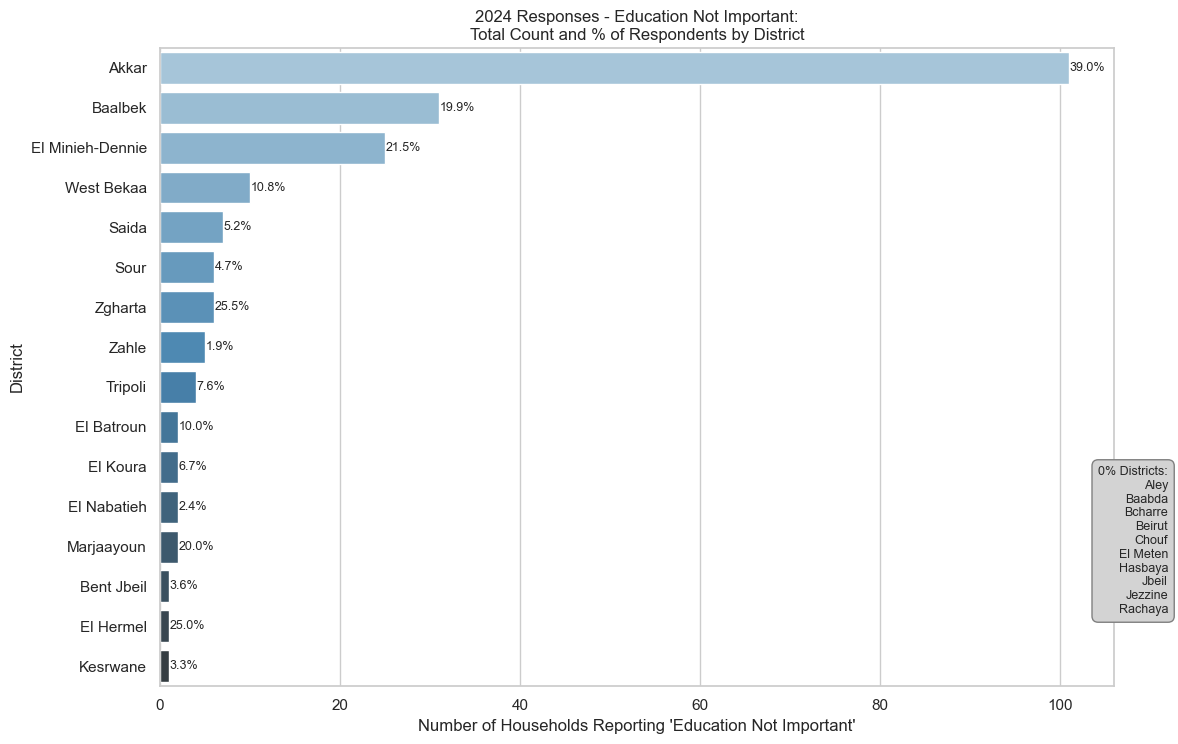

In [92]:
# Filter out districts with 0% responses
non_zero_df = no_school_2024[no_school_2024['education_not_important_pct'] > 0]
zero_df = no_school_2024[no_school_2024['education_not_important_pct'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='education_not_important', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='education_not_important', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['education_not_important'] + 0.06,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['education_not_important_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'Education Not Important'")
plt.ylabel("District")
plt.title("2024 Responses - Education Not Important:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('educationnotimportant_2024.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_53620/1074955077.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overcrowded_classes', y='dist_leb', data=sorted_df, palette='Blues_d')


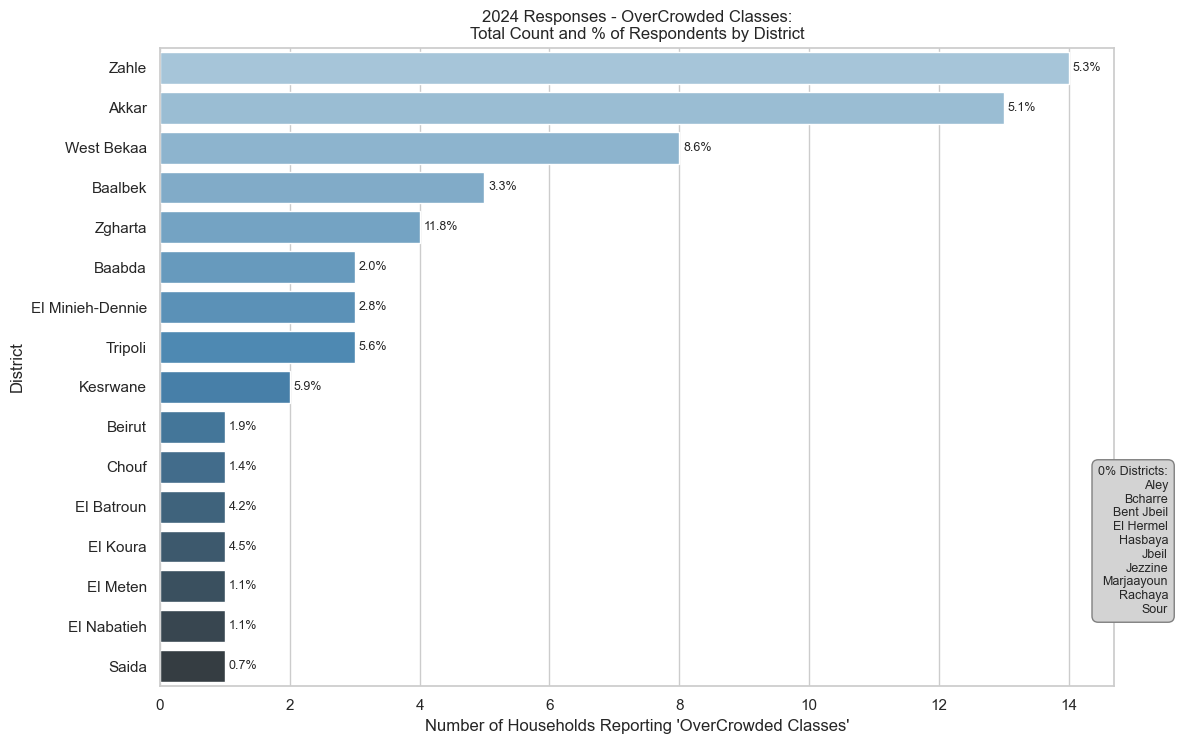

In [93]:
# Filter out districts with 0% responses
non_zero_df = no_school_2024[no_school_2024['overcrowded_classes_pct'] > 0]
zero_df = no_school_2024[no_school_2024['overcrowded_classes_pct'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='overcrowded_classes', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='overcrowded_classes', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['overcrowded_classes'] + 0.06,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['overcrowded_classes_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'OverCrowded Classes'")
plt.ylabel("District")
plt.title("2024 Responses - OverCrowded Classes:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('overcrowdedclasses_2024.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_53620/1509556430.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='school_too_far', y='dist_leb', data=sorted_df, palette='Blues_d')


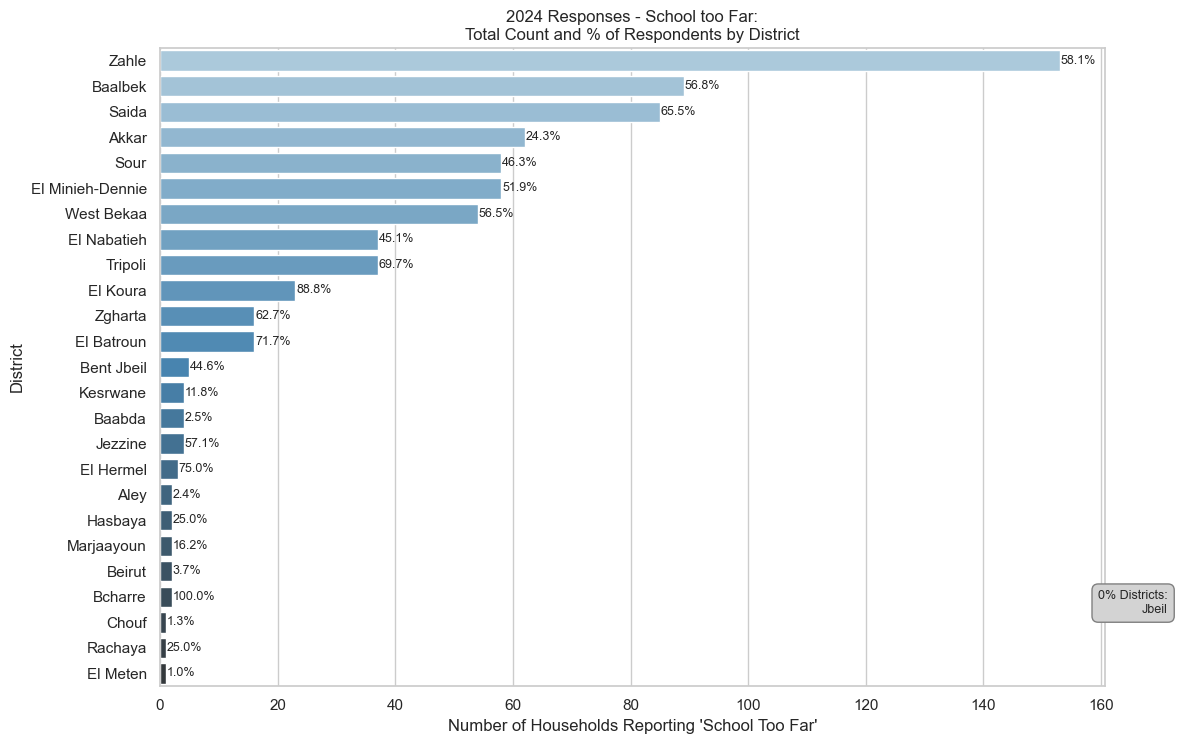

In [94]:
# Filter out districts with 0% responses
non_zero_df = no_school_2024[no_school_2024['school_too_far_pct'] > 0]
zero_df = no_school_2024[no_school_2024['school_too_far_pct'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='school_too_far', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='school_too_far', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['school_too_far'] + 0.16,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['school_too_far_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'School Too Far'")
plt.ylabel("District")
plt.title("2024 Responses - School too Far:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('schooltoofar_2024.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_53620/913978856.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='child_has_to_work', y='dist_leb', data=sorted_df, palette='Blues_d')


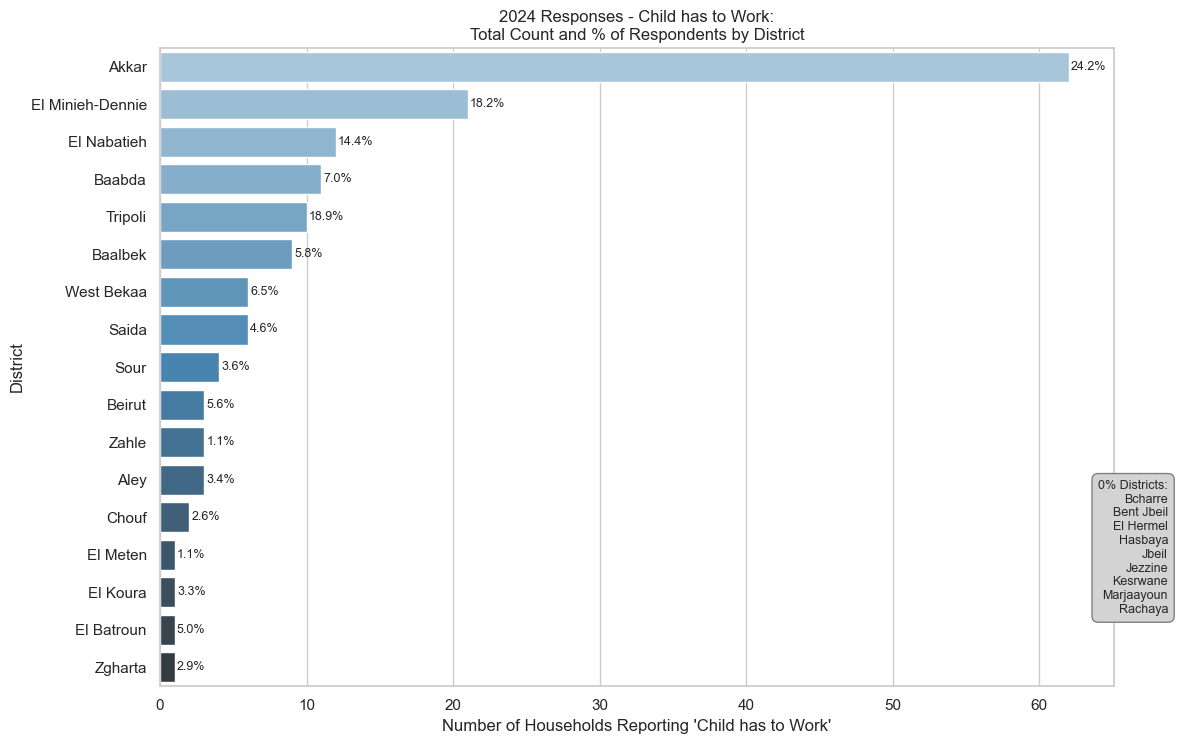

In [95]:
# Filter out districts with 0% responses
non_zero_df = no_school_2024[no_school_2024['child_has_to_work_pct'] > 0]
zero_df = no_school_2024[no_school_2024['child_has_to_work_pct'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='child_has_to_work', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='child_has_to_work', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['child_has_to_work'] + 0.16,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['child_has_to_work_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'Child has to Work'")
plt.ylabel("District")
plt.title("2024 Responses - Child has to Work:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('childhastowork_2024.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_53620/3356903897.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='school_too_far', y='dist_leb', data=sorted_df, palette='Blues_d')


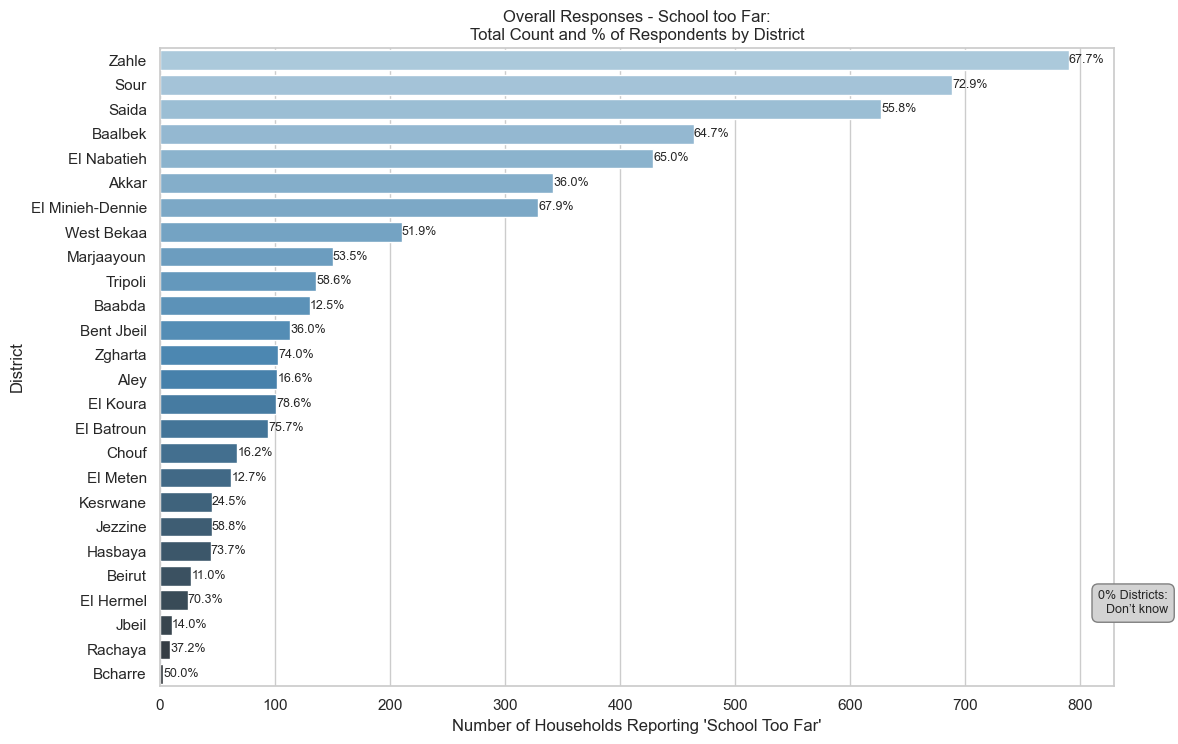

In [96]:
#### Overall

# Filter out districts with 0% responses
non_zero_df = schooling_df[schooling_df['school_too_far'] > 0]
zero_df = schooling_df[schooling_df['school_too_far'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='school_too_far', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='school_too_far', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['school_too_far'] + 0.16,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['school_too_far_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'School Too Far'")
plt.ylabel("District")
plt.title("Overall Responses - School too Far:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('schooltoofar_overall.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_53620/2342161702.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='child_has_to_work', y='dist_leb', data=sorted_df, palette='Blues_d')


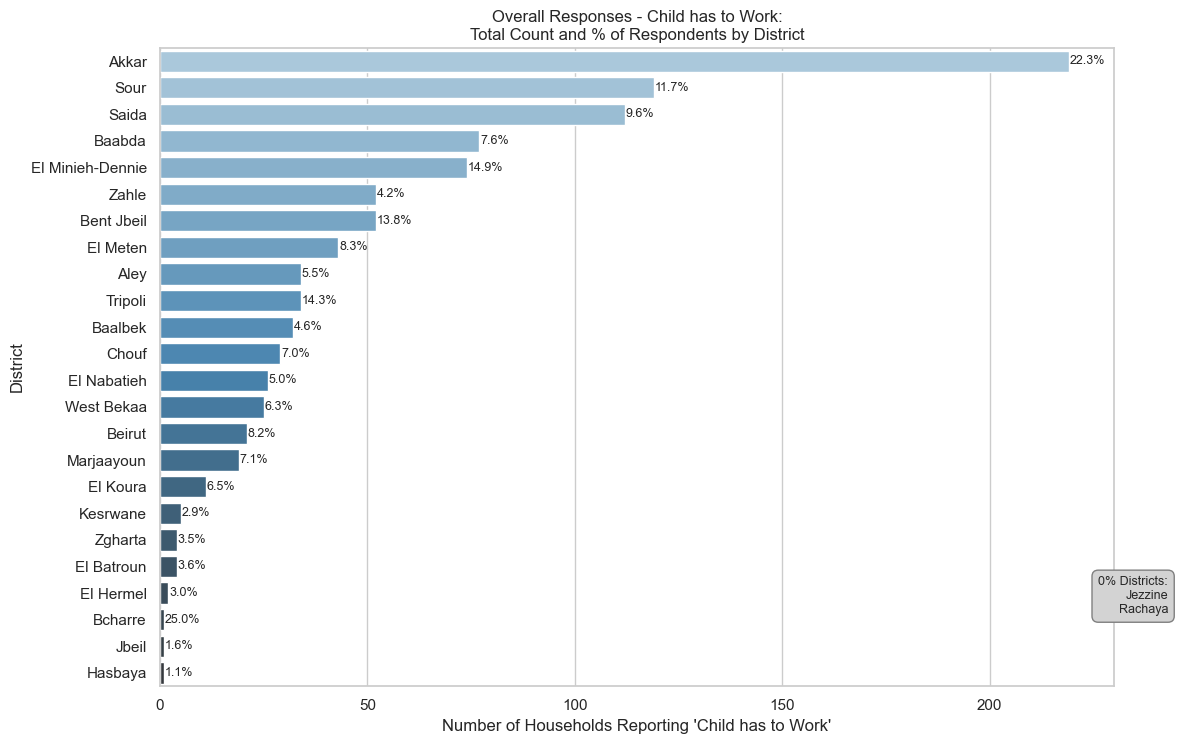

In [97]:
#### Overall

# Filter out districts with 0% responses
non_zero_df = schooling_df[schooling_df['child_has_to_work_pct'] > 0]
zero_df = schooling_df[schooling_df['child_has_to_work_pct'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='child_has_to_work', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='child_has_to_work', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['child_has_to_work'] + 0.16,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['child_has_to_work_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'Child has to Work'")
plt.ylabel("District")
plt.title("Overall Responses - Child has to Work:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('childhastowork_overall.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_53620/617438714.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overcrowded_classes', y='dist_leb', data=sorted_df, palette='Blues_d')


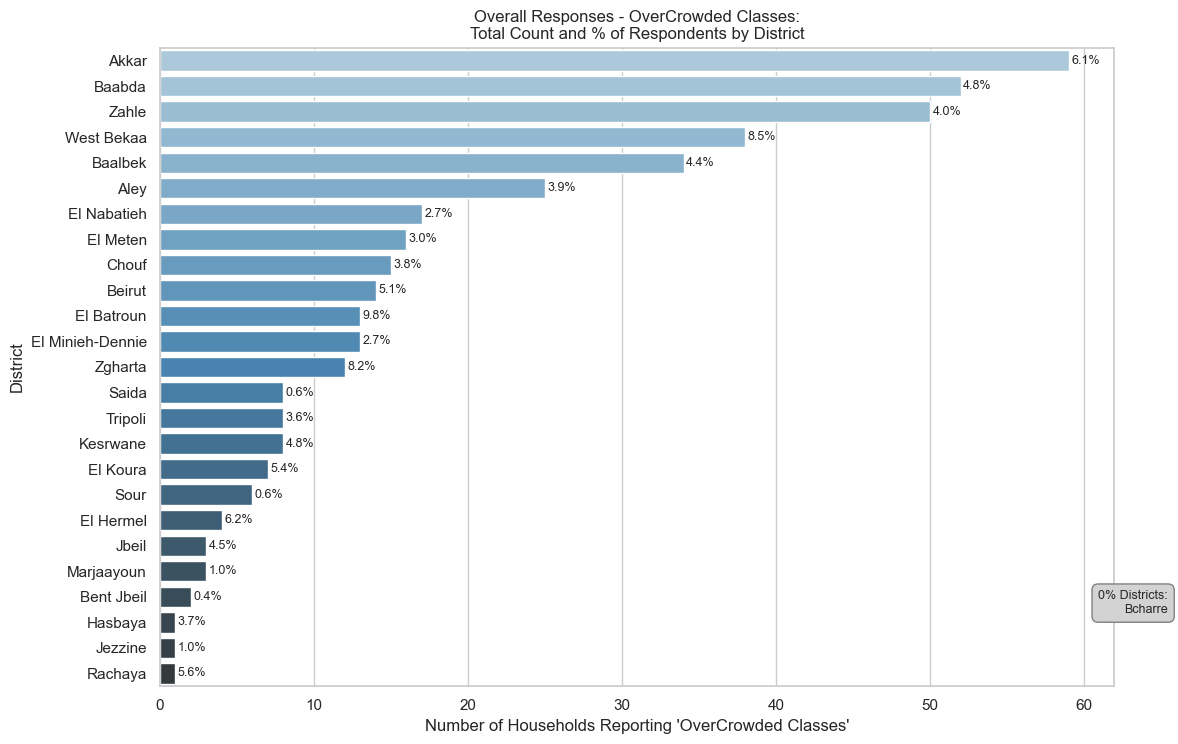

In [98]:
#### Overall

# Filter out districts with 0% responses
non_zero_df = schooling_df[schooling_df['overcrowded_classes_pct'] > 0]
zero_df = schooling_df[schooling_df['overcrowded_classes_pct'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='overcrowded_classes', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='overcrowded_classes', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['overcrowded_classes'] + 0.16,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['overcrowded_classes_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'OverCrowded Classes'")
plt.ylabel("District")
plt.title("Overall Responses - OverCrowded Classes:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('overcrowdedclasses_overall.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_93107/1609713178.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education_not_important', y='dist_leb', data=sorted_df, palette='Blues_d')


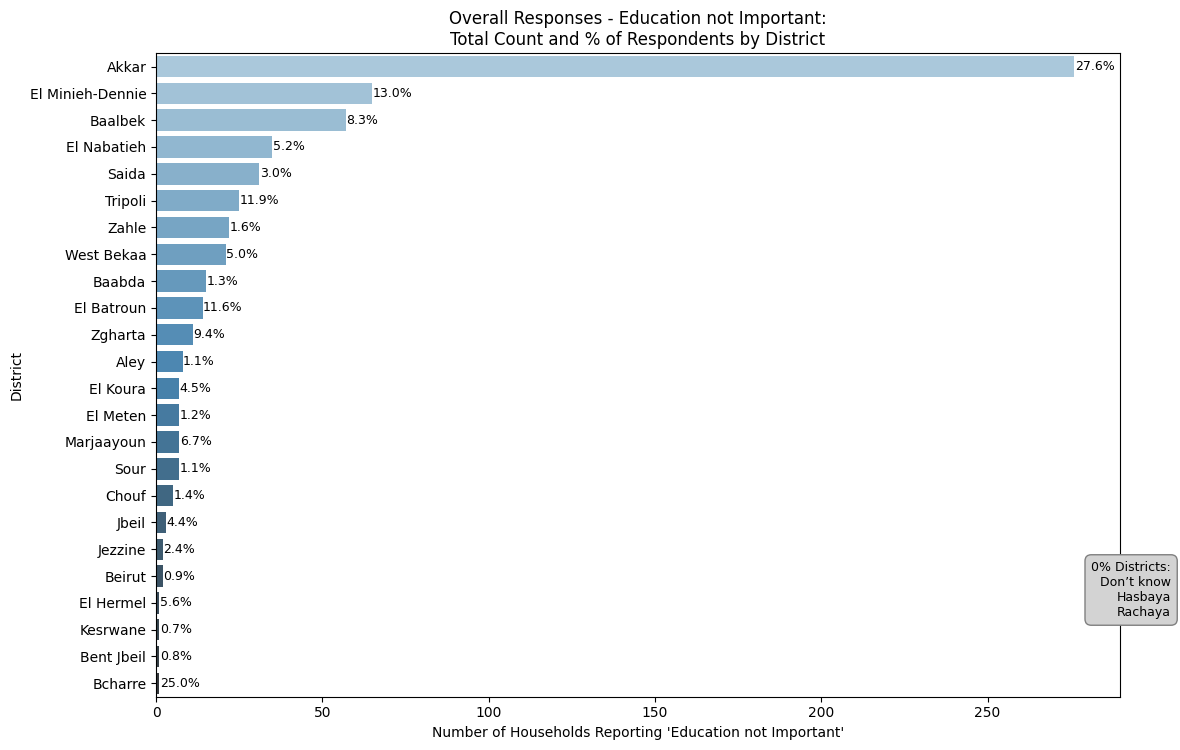

In [41]:
#### Overall

# Filter out districts with 0% responses
non_zero_df = schooling_df[schooling_df['education_not_important_pct'] > 0]
zero_df = schooling_df[schooling_df['education_not_important'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='education_not_important', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='education_not_important', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['education_not_important'] + 0.16,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['education_not_important_pct']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'Education not Important'")
plt.ylabel("District")
plt.title("Overall Responses - Education not Important:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('educationnotimportant_overall.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_93107/3224698790.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='child_labor_incidents', y='dist_leb', data=sorted_df, palette='Blues_d')


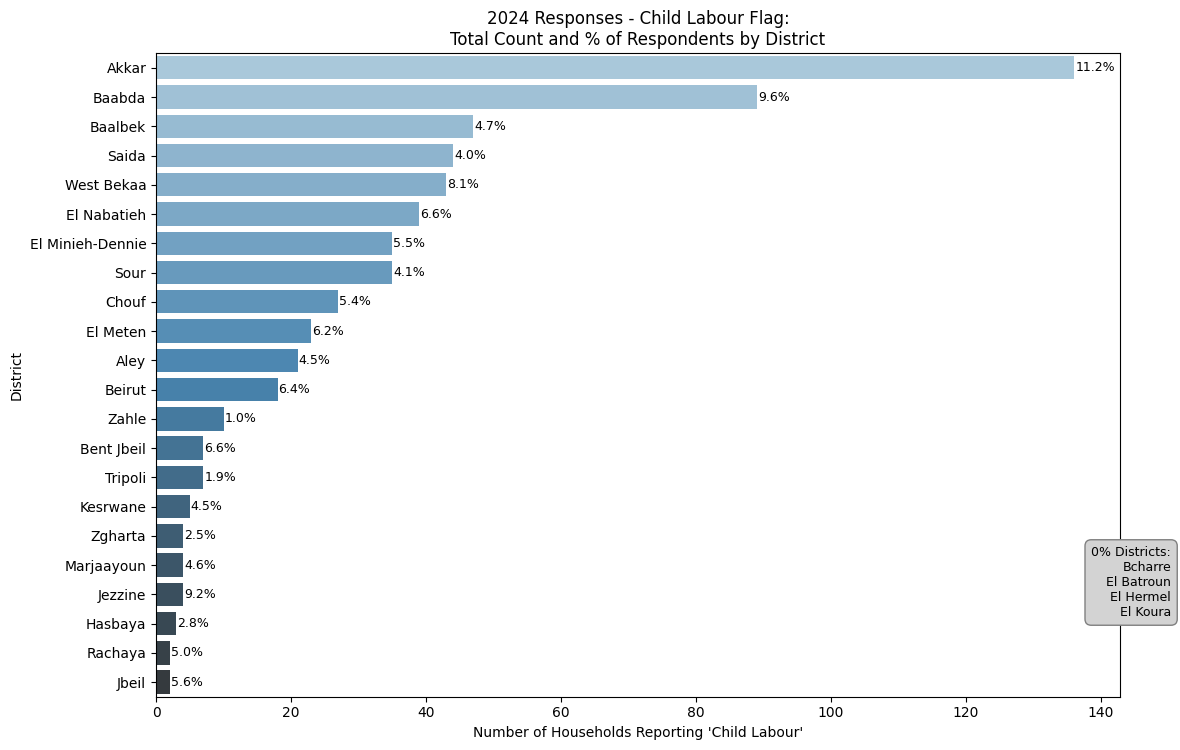

In [37]:
#### Overall

temp = geo_df[geo_df['year'] == 2024].groupby(['year', 'dist_leb'])['child_labor_incidents'].sum().reset_index()
temp2 = geo_df[geo_df['year'] == 2024].groupby(['year', 'dist_leb'])['pct_flagged_hhs'].mean().reset_index()

temp = temp.merge(temp2)

# Filter out districts with 0% responses
non_zero_df = temp[temp['child_labor_incidents'] > 0]
zero_df = temp[temp['child_labor_incidents'] == 0]

# Sort by total count
sorted_df = non_zero_df.sort_values(by='child_labor_incidents', ascending=False)

# Set up plot
plt.figure(figsize=(12, 8))
sns.barplot(x='child_labor_incidents', y='dist_leb', data=sorted_df, palette='Blues_d')

# Add % text annotations
for i, row in sorted_df.iterrows():
    plt.text(row['child_labor_incidents'] + 0.16,                # X position (a bit offset to the right of the bar)
             sorted_df.index.get_loc(i),                        # Y position (based on sorted index)
             f"{row['pct_flagged_hhs']:.1f}%",      # Text to display
             va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Households Reporting 'Child Labour'")
plt.ylabel("District")
plt.title("2024 Responses - Child Labour Flag:\nTotal Count and % of Respondents by District")

# Add box for 0% districts
if not zero_df.empty:
    zero_districts = zero_df['dist_leb'].tolist()
    zero_text = "0% Districts:\n" + "\n".join(zero_districts)
    plt.gcf().text(0.98, 0.22, zero_text, fontsize=9, va='bottom', ha='right',
                   bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 0.95, 1])  # Leave space for text box
plt.savefig('childlabourflags_overall.png')
plt.show()

In [42]:
geo_df.columns

Index(['year', 'quarter', 'dist_leb', 'hh_size_avg', 'no_children_avg',
       'no_over_fifteen_avg', 'work_income_avg',
       'humanitarian_assistance_income_avg', 'eviction_notice',
       'actual_eviction', 'socio_econ_rent', 'socio_econ_food_money',
       'socio_econ_healthcare', 'socio_econ_medicine',
       'socio_econ_med_availability', 'socio_econ_loss_job',
       'socio_econ_famsupport', 'socio_econ_mentalhealth',
       'socio_econ_education', 'socio_econ_shelter', 'socio_econ_threat_evict',
       'socio_econ_lowerqual_shelter', 'socio_econ_abandoned',
       'socio_econ_return', 'socio_econ_moved_leb', 'socio_econ_travel_third',
       'socio_econ_baby', 'socio_econ_travel_homeclimate', 'socio_econ_none',
       'socio_econ_dk01', 'socio_econ_noreply', 'current_debt_avg',
       'unabletravel', 'children_symptoms_sadness',
       'children_symptoms_withdrawal', 'children_symptoms_selfharm',
       'children_symptoms_suicidal', 'children_symptoms_low_interest',
       'ch

In [104]:
def aggregate_to_year_district(df):
    import pandas as pd

    # Set new groupby level
    group_cols = ['year', 'dist_leb']

    # Columns to drop before aggregation
    drop_cols = ['quarter', 'id'] if 'id' in df.columns else ['quarter']

    # Drop irrelevant columns
    df_clean = df.drop(columns=drop_cols)

    # Define aggregation rule
    agg_dict = {
        col: (
            'mean' if (
                col.endswith('_avg') or 
                col.endswith('_pct')
            ) else 'sum'
        )
        for col in df_clean.columns 
        if col not in group_cols
    }

    # Perform aggregation
    aggregated_df = df_clean.groupby(group_cols).agg(agg_dict).reset_index()

    return aggregated_df

In [105]:
yearly_df = aggregate_to_year_district(geo_df)
yearly_df.to_csv('Regional_YearLevel Dataset_Lebanon.csv', index = False)

In [47]:
columns = ['school_No – My child/children are still attending school',
       'school_No – My child/children were already out of school',
       'school_Yes – I have a child who was attending school but who stopped in the last 30 days',
       'school_child/children are too young for school']

final_df[columns]

,school_No – My child/children are still attending school,school_No – My child/children were already out of school,school_Yes – I have a child who was attending school but who stopped in the last 30 days,school_child/children are too young for school
37332,False,False,False,False
37333,False,False,False,False
37336,False,False,False,False
37337,False,False,False,False
37340,False,False,False,False
...,...,...,...,...
103915,False,True,False,False
103916,True,False,False,False
103918,True,False,False,False
103920,True,False,False,False


In [48]:
def aggregate_school_status(df, dummy_columns, group_cols=['year', 'dist_leb']):
    # Count total responses (non-NA rows) per group
    total_responses = df.groupby(group_cols)[dummy_columns].count()

    # Sum of 1s (since they’re dummies)
    counts = df.groupby(group_cols)[dummy_columns].sum()

    # Percentages
    percentages = (counts / total_responses) * 100

    # Rename columns
    counts.columns = [col + "_count" for col in dummy_columns]
    percentages.columns = [col + "_pct" for col in dummy_columns]

    # Combine into one DataFrame
    combined = pd.concat([counts, percentages], axis=1).reset_index()

    return combined

school_cols = [
    'school_No – My child/children are still attending school',
    'school_No – My child/children were already out of school',
    'school_Yes – I have a child who was attending school but who stopped in the last 30 days',
    'school_child/children are too young for school'
]

aggregated_school_df = aggregate_school_status(final_df, school_cols)

In [65]:
aggregated_school_df.columns

Index(['year', 'dist_leb',
       'school_No – My child/children are still attending school_count',
       'school_No – My child/children were already out of school_count',
       'school_Yes – I have a child who was attending school but who stopped in the last 30 days_count',
       'school_child/children are too young for school_count',
       'school_No – My child/children are still attending school_pct',
       'school_No – My child/children were already out of school_pct',
       'school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct',
       'school_child/children are too young for school_pct'],
      dtype='object')

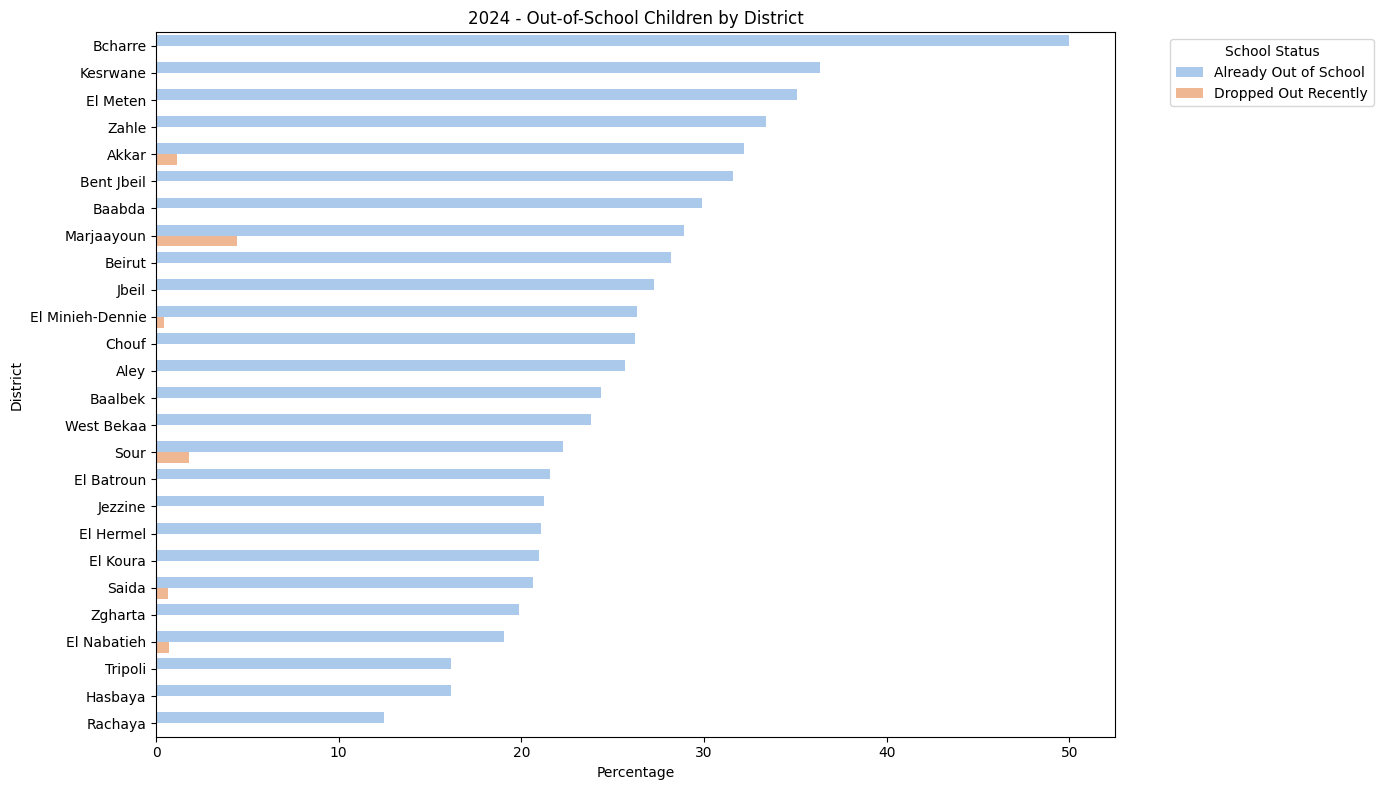

In [60]:
# Columns you want to plot
columns_to_plot = {
    'school_No – My child/children were already out of school': 'Already Out of School',
    'school_Yes – I have a child who was attending school but who stopped in the last 30 days': 'Dropped Out Recently'
}

# Filter for 2024
school_2024 = aggregated_school_df[aggregated_school_df['year'] == 2024]

# Keep only the relevant % columns
plot_df = school_2024[['dist_leb'] + [col + '_pct' for col in columns_to_plot.keys()]]

# Rename columns for nicer labels
plot_df = plot_df.rename(columns={
    col + '_pct': label for col, label in columns_to_plot.items()
})

# Sort by 'Already Out of School' %
plot_df = plot_df.sort_values(by='Already Out of School', ascending=False)

# Melt for seaborn
plot_df_melted = plot_df.melt(id_vars='dist_leb', var_name='School Status', value_name='Percentage')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=plot_df_melted, y='dist_leb', x='Percentage', hue='School Status', palette='pastel')

plt.title("2024 - Out-of-School Children by District")
plt.xlabel("Percentage")
plt.ylabel("District")
plt.legend(title="School Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


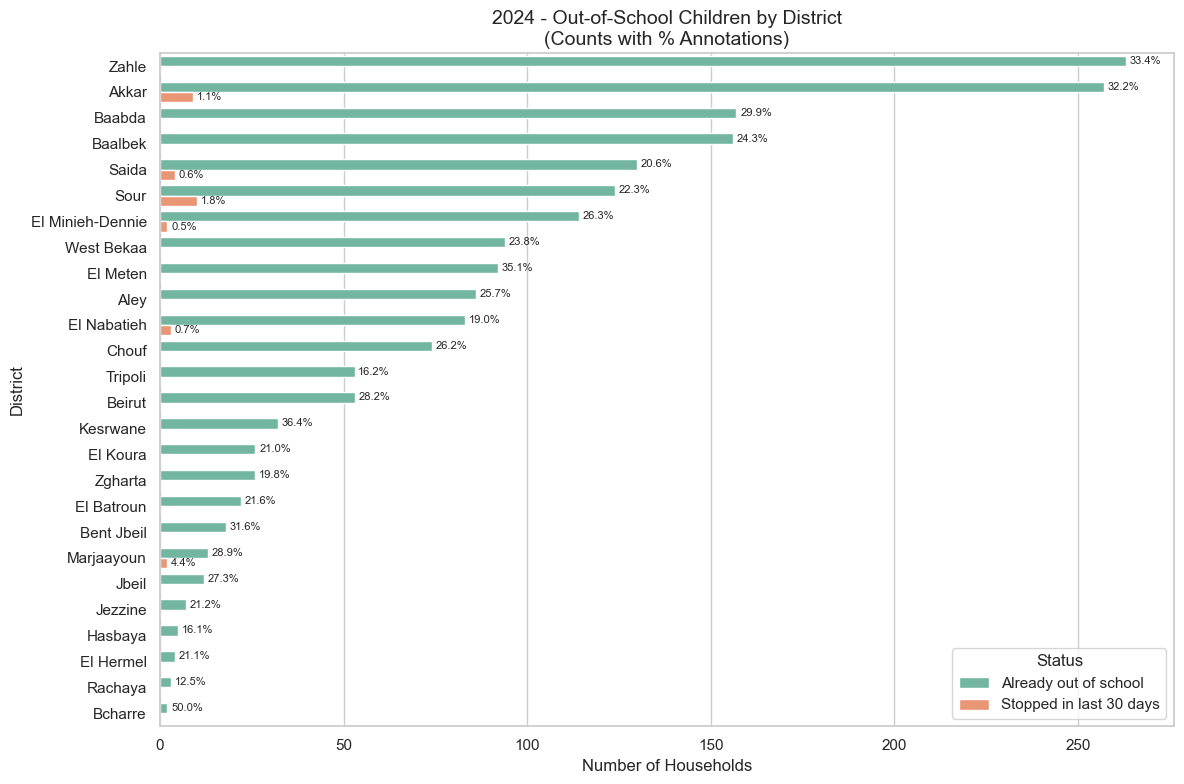

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename for simplicity
col1_count = 'school_No – My child/children were already out of school_count'
col2_count = 'school_Yes – I have a child who was attending school but who stopped in the last 30 days_count'
col1_pct = 'school_No – My child/children were already out of school_pct'
col2_pct = 'school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct'

# Filter for 2024
plot_df = aggregated_school_df[aggregated_school_df['year'] == 2024][['dist_leb', col1_count, col2_count, col1_pct, col2_pct]].copy()

# Sort by col1 count descending
plot_df = plot_df.sort_values(by=col1_count, ascending=False)

# Melt to long format for seaborn
melted_df = plot_df.melt(
    id_vars='dist_leb',
    value_vars=[col1_count, col2_count],
    var_name='Category',
    value_name='Count'
)

# Merge corresponding % values
pct_map = {
    col1_count: col1_pct,
    col2_count: col2_pct
}
melted_df['Percentage'] = melted_df.apply(
    lambda row: plot_df.loc[plot_df['dist_leb'] == row['dist_leb'], pct_map[row['Category']]].values[0],
    axis=1
)

# Rename categories for cleaner legend
rename_map = {
    col1_count: 'Already out of school',
    col2_count: 'Stopped in last 30 days'
}
melted_df['Category'] = melted_df['Category'].replace(rename_map)

# Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=melted_df,
    x='Count',
    y='dist_leb',
    hue='Category',
    palette='Set2'
)

# Add % annotations
for container in barplot.containers:
    for bar in container:
        height = bar.get_height()
        width = bar.get_width()
        if width > 0:
            x = bar.get_x() + width + 1
            y = bar.get_y() + height / 2
            index = barplot.patches.index(bar)
            try:
                row = melted_df.iloc[index]
                barplot.text(
                    x,
                    y,
                    f"{row['Percentage']:.1f}%",
                    va='center',
                    ha='left',
                    fontsize=8
                )
            except IndexError:
                continue

# Final touches
plt.title("2024 - Out-of-School Children by District\n(Counts with % Annotations)", fontsize=14)
plt.xlabel("Number of Households")
plt.ylabel("District")
plt.legend(title="Status")
plt.tight_layout()
plt.savefig('outofschool_children_2024.png')
plt.show()

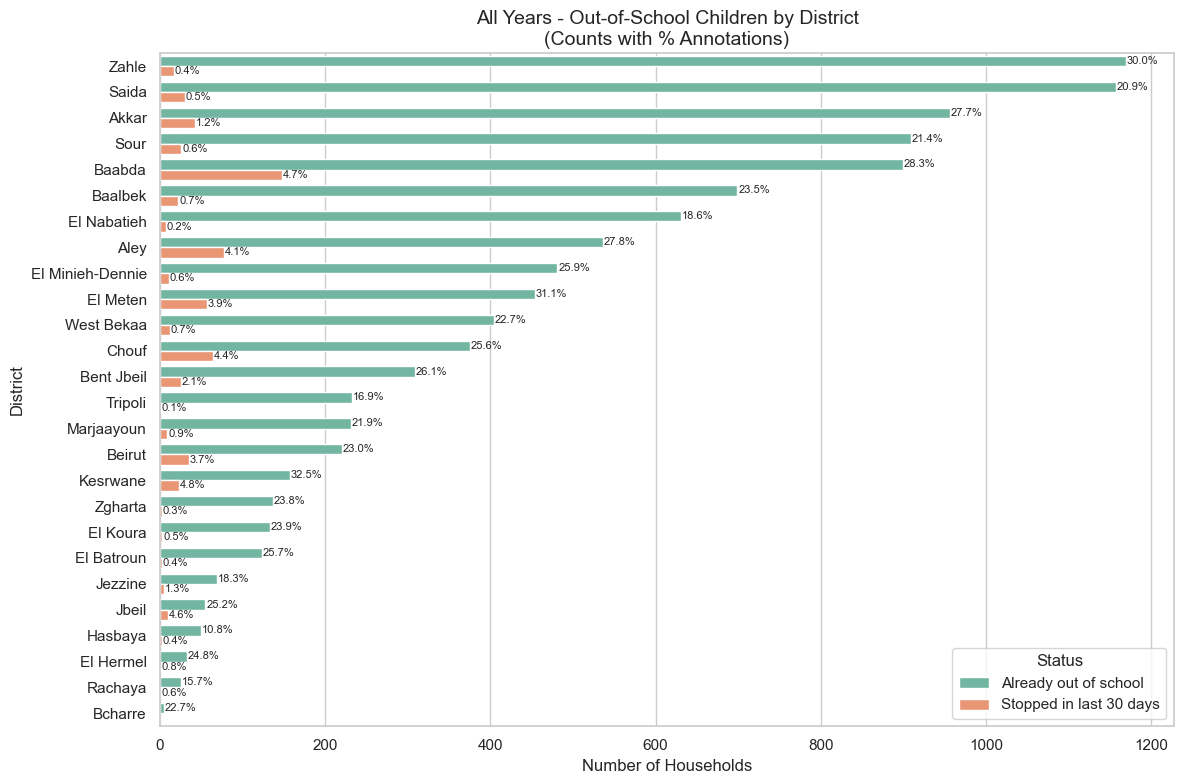

In [79]:
# Rename for clarity
col1_count = 'school_No – My child/children were already out of school_count'
col2_count = 'school_Yes – I have a child who was attending school but who stopped in the last 30 days_count'
col3_count =  'school_No – My child/children are still attending school_count'
col4_count = 'school_child/children are too young for school_count'
col1_pct = 'school_No – My child/children were already out of school_pct'
col2_pct = 'school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct'

# Step 1: Aggregate counts by district
agg_df = aggregated_school_df.groupby('dist_leb')[[col1_count, col2_count, col3_count, col4_count]].sum().reset_index()
# Remove "Don't know" district
agg_df = agg_df[~agg_df['dist_leb'].str.replace("’", "'").str.strip().str.lower().isin(["don't know"])]

# Step 2: Calculate total responses for each district
agg_df['total_responses'] = agg_df[col1_count] + agg_df[col2_count] + agg_df[col3_count] + agg_df[col4_count]

# Step 3: Recalculate percentage
agg_df[col1_pct] = agg_df[col1_count] / agg_df['total_responses'] * 100
agg_df[col2_pct] = agg_df[col2_count] / agg_df['total_responses'] * 100


# Step 4: Sort by count of "already out of school"
agg_df = agg_df.sort_values(by=col1_count, ascending=False)


# Step 5: Melt to long format
melted_df = agg_df.melt(
    id_vars='dist_leb',
    value_vars=[col1_count, col2_count],
    var_name='Category',
    value_name='Count'
)

# Step 6: Merge percentages
pct_map = {
    col1_count: col1_pct,
    col2_count: col2_pct
}
melted_df['Percentage'] = melted_df.apply(
    lambda row: agg_df.loc[agg_df['dist_leb'] == row['dist_leb'], pct_map[row['Category']]].values[0],
    axis=1
)

# Step 7: Rename categories
rename_map = {
    col1_count: 'Already out of school',
    col2_count: 'Stopped in last 30 days'
}
melted_df['Category'] = melted_df['Category'].replace(rename_map)

# Step 8: Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=melted_df,
    x='Count',
    y='dist_leb',
    hue='Category',
    palette='Set2'
)

# Step 9: Annotate with percentages
for container in barplot.containers:
    for bar in container:
        width = bar.get_width()
        height = bar.get_height()
        if width > 0:
            x = bar.get_x() + width + 1
            y = bar.get_y() + height / 2
            index = barplot.patches.index(bar)
            try:
                row = melted_df.iloc[index]
                barplot.text(
                    x,
                    y,
                    f"{row['Percentage']:.1f}%",
                    va='center',
                    ha='left',
                    fontsize=8
                )
            except IndexError:
                continue

# Final polish
plt.title("All Years - Out-of-School Children by District\n(Counts with % Annotations)", fontsize=14)
plt.xlabel("Number of Households")
plt.ylabel("District")
plt.legend(title="Status")
plt.tight_layout()
plt.savefig('outofschool_children.png')
plt.show()

In [82]:
geo_df.columns

Index(['year', 'quarter', 'dist_leb', 'hh_size_avg', 'no_children_avg',
       'no_over_fifteen_avg', 'work_income_avg',
       'humanitarian_assistance_income_avg', 'eviction_notice',
       'actual_eviction', 'socio_econ_rent', 'socio_econ_food_money',
       'socio_econ_healthcare', 'socio_econ_medicine',
       'socio_econ_med_availability', 'socio_econ_loss_job',
       'socio_econ_famsupport', 'socio_econ_mentalhealth',
       'socio_econ_education', 'socio_econ_shelter', 'socio_econ_threat_evict',
       'socio_econ_lowerqual_shelter', 'socio_econ_abandoned',
       'socio_econ_return', 'socio_econ_moved_leb', 'socio_econ_travel_third',
       'socio_econ_baby', 'socio_econ_travel_homeclimate', 'socio_econ_none',
       'socio_econ_dk01', 'socio_econ_noreply', 'current_debt_avg',
       'unabletravel', 'children_symptoms_sadness',
       'children_symptoms_withdrawal', 'children_symptoms_selfharm',
       'children_symptoms_suicidal', 'children_symptoms_low_interest',
       'ch